In [1]:
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [2]:
# json_file = "/home/ankitk/Desktop/AVQA/translated_train.json"
# new = pd.read_json(json_file)
import pandas as pd
import json
import tensorflow as tf
import torch
import numpy as np

json_file = "/kaggle/input/kkkkkkkkkkkkkk/merged_data_10000_ours.json"

data = []
with open(json_file, 'r') as file:
    for line in file:
        data.append(json.loads(line))

train_df = pd.DataFrame(data)


2024-03-30 16:56:53.823359: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-30 16:56:53.823417: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-30 16:56:53.824998: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [3]:
train_df.head()

,video_id,question_id,type,question_content,templ_values,question_deleted,anser,question,Quest_hindi,ans_hindi
0,00000136,17,"[""Audio-Visual"", ""Comparative""]",Is the instrument on the <LR> louder than the ...,"[""left"", ""right""]",0,no,Is the instrument on the left louder than the ...,क्या बायीं ओर का वाद्ययंत्र दाहिनी ओर के वाद्य...,नहीं
1,00000250,23,"[""Audio-Visual"", ""Existential""]",Is the <Object> in the video always playing?,"[""accordion""]",0,yes,Is the accordion in the video always playing?,क्या वीडियो में अकॉर्डियन हमेशा बजता रहता है?,हाँ
2,00000225,27,"[""Audio-Visual"", ""Existential""]",Is there a voiceover?,[],0,yes,Is there a voiceover?,क्या कोई वॉयसओवर है?,हाँ
3,00000152,30,"[""Audio-Visual"", ""Existential""]",Is this sound from the instrument in the video?,[],0,yes,Is this sound from the instrument in the video?,क्या यह ध्वनि वीडियो में मौजूद उपकरण की है?,हाँ
4,00000085,32,"[""Audio-Visual"", ""Existential""]",Is there a voiceover?,[],0,no,Is there a voiceover?,क्या कोई वॉयसओवर है?,नहीं


In [4]:
import os
import numpy as np

def concatenate_arrays(folder_path):
    arrays = []
    for filename in os.listdir(folder_path):
        if filename.endswith('.npy'):
            array_path = os.path.join(folder_path, filename)
            array = np.load(array_path)
            arrays.append(array)
    #concatenated_array = np.concatenate(arrays, axis=1)
    return arrays

folder_path = '/kaggle/input/embeddingsdata/video_features_new/video_features_new'
result_array = concatenate_arrays(folder_path)
video_array = np.array(result_array)
print(video_array.shape)

(5870, 768)


In [5]:
arr = np.load("/kaggle/input/embeddingsdata/video_features_new/video_features_new/00000002.npy")
print(arr.shape)

(768,)


In [6]:
import os
import numpy as np

def concatenate_arrays(folder_path):
    arrays = []
    for filename in os.listdir(folder_path):
        if filename.endswith('.npy'):
            array_path = os.path.join(folder_path, filename)
            array = np.load(array_path)
            arrays.append(array)
    #concatenated_array = np.concatenate(arrays, axis=1)
    return arrays

folder_patha = '/kaggle/input/audio-feats/Audio_features'
result_arraya = concatenate_arrays(folder_patha)
audio_array = np.array(result_arraya)
audio_array = audio_array[0:5870]
print(audio_array.shape)

(5870, 768)


In [7]:
hinglish_array = np.load("/kaggle/input/embeddingsdata/embeddings.npy")
hinglish_array = hinglish_array[0:5870]
print(hinglish_array.shape)

english_array = np.load("/kaggle/input/english-question-embeddings/english_question_embeddings.npy")
english_array = english_array[0:5870]
print(english_array.shape)

(5870, 768)
(5870, 768)


In [8]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train_df['labels'] = le.fit_transform(train_df['anser'])
train_df = train_df[0:5870]
train_df.head()

,video_id,question_id,type,question_content,templ_values,question_deleted,anser,question,Quest_hindi,ans_hindi,labels
0,00000136,17,"[""Audio-Visual"", ""Comparative""]",Is the instrument on the <LR> louder than the ...,"[""left"", ""right""]",0,no,Is the instrument on the left louder than the ...,क्या बायीं ओर का वाद्ययंत्र दाहिनी ओर के वाद्य...,नहीं,0
1,00000250,23,"[""Audio-Visual"", ""Existential""]",Is the <Object> in the video always playing?,"[""accordion""]",0,yes,Is the accordion in the video always playing?,क्या वीडियो में अकॉर्डियन हमेशा बजता रहता है?,हाँ,1
2,00000225,27,"[""Audio-Visual"", ""Existential""]",Is there a voiceover?,[],0,yes,Is there a voiceover?,क्या कोई वॉयसओवर है?,हाँ,1
3,00000152,30,"[""Audio-Visual"", ""Existential""]",Is this sound from the instrument in the video?,[],0,yes,Is this sound from the instrument in the video?,क्या यह ध्वनि वीडियो में मौजूद उपकरण की है?,हाँ,1
4,00000085,32,"[""Audio-Visual"", ""Existential""]",Is there a voiceover?,[],0,no,Is there a voiceover?,क्या कोई वॉयसओवर है?,नहीं,0


In [9]:
train_df = train_df[['video_id', 'question_id', 'type', 'labels']]

In [10]:
from sklearn.model_selection import train_test_split
X_trainv, X_testv, y_train, y_test = train_test_split(video_array, train_df['labels'], test_size=0.2, random_state=42)

print("For Video:")
print("X_train shape:", X_trainv.shape)
print("X_test shape:", X_testv.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_traina, X_testa, y_train, y_test = train_test_split(audio_array, train_df['labels'], test_size=0.2, random_state=42)

print("For Audio:")
print("X_train shape:", X_traina.shape)
print("X_test shape:", X_testa.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)




X_traint, X_testt, y_train, y_test = train_test_split(hinglish_array, train_df['labels'], test_size=0.2, random_state=42)

print("For Audio:")
print("X_train shape:", X_traint.shape)
print("X_test shape:", X_testt.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

For Video:
X_train shape: (4696, 768)
X_test shape: (1174, 768)
y_train shape: (4696,)
y_test shape: (1174,)
For Audio:
X_train shape: (4696, 768)
X_test shape: (1174, 768)
y_train shape: (4696,)
y_test shape: (1174,)
For Audio:
X_train shape: (4696, 768)
X_test shape: (1174, 768)
y_train shape: (4696,)
y_test shape: (1174,)


In [11]:
! pip install keras_nlp

In [12]:
import keras_nlp
encoder1 = keras_nlp.layers.TransformerEncoder(intermediate_dim=120, num_heads=4)
encoder2 = keras_nlp.layers.TransformerEncoder(intermediate_dim=120, num_heads=4)
encoder3 = keras_nlp.layers.TransformerEncoder(intermediate_dim=120, num_heads=4)

Using TensorFlow backend


In [13]:
def create_model():


    input_1 = tf.keras.Input(shape=[768, 1])
    x1 = tf.keras.layers.Conv1D(32, 3, activation = 'relu', padding = 'same', name= "cnn1")(input_1)
    x1 = tf.keras.layers.MaxPooling1D(name= "maxpool1")(x1)
    x1 = encoder1(x1)
    x1 = tf.keras.layers.Flatten()(x1)


    input_2 = tf.keras.Input(shape=[768, 1])
    x2 = tf.keras.layers.Conv1D(32, 3, activation = 'relu', padding = 'same')(input_2)
    x2 = tf.keras.layers.MaxPooling1D()(x2)
    x2 = encoder1(x2)
    x2 = tf.keras.layers.Flatten()(x2)
    
    input_3 = tf.keras.Input(shape=[768, 1])
    x3 = tf.keras.layers.Conv1D(32, 3, activation = 'relu', padding = 'same')(input_3)
    x3 = tf.keras.layers.MaxPooling1D()(x3)
    x3 = encoder1(x3)
    x3 = tf.keras.layers.Flatten()(x3)

    concatenated = tf.keras.layers.Concatenate(axis=1)([x1, x2, x3])
    x = tf.keras.layers.Dense(200, activation='relu',  name= "dense1")(concatenated)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.Dense(90, activation = 'relu', name= "dense2")(x)
    x = tf.keras.layers.Dropout(0.2)(x)
    x = tf.keras.layers.Dense(56, activation = 'relu', name= "dense3")(x)
    output = tf.keras.layers.Dense(2, activation='softmax', name= "output")(x)
    model = tf.keras.Model(inputs= [input_1, input_2, input_3], outputs = output)
    return model
hinglish_model = create_model()
hinglish_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 768, 1)]             0         []                            
                                                                                                  
 input_2 (InputLayer)        [(None, 768, 1)]             0         []                            
                                                                                                  
 input_3 (InputLayer)        [(None, 768, 1)]             0         []                            
                                                                                                  
 cnn1 (Conv1D)               (None, 768, 32)              128       ['input_1[0][0]']             
                                                                                              

In [14]:
lr = 1e-3
#import tensorflow_addons as tfa
optimizer = tf.keras.optimizers.Adam(learning_rate= lr)
#optimizer = tfa.optimizers.RectifiedAdam(learning_rate= lr)
# Compile the model with the Riemannian optimizer
hinglish_model.compile(
    optimizer=optimizer,
    loss= tf.keras.losses.SparseCategoricalCrossentropy(), #focal_loss(alpha=0.25, gamma=2.0),#tf.keras.losses.SparseCategoricalCrossentropy(),  #from_logits=True
    metrics= ['accuracy']  #[tf.keras.metrics.SparseCategoricalAccuracy()],
)


reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor = 'val_accuracy',
                                                 factor = 0.2,
                                                 patience = 1,
                                                 verbose = 1,
                                                 min_delta = 1e-4,
                                                 min_lr = 1e-15,
                                                 mode = 'max')

earlystopping = tf.keras.callbacks.EarlyStopping(monitor = 'val_accuracy',
                                                 min_delta = 1e-4,
                                                 patience = 70,
                                                 mode = 'max',
                                                 restore_best_weights = True,
                                                 verbose = 1)

callbacks = [earlystopping, reduce_lr]#reduce_lr]

In [15]:
import time
start_time = time.time()
history = hinglish_model.fit([X_trainv,X_traina , X_traint], y_train,
                   validation_data =  ([X_testv, X_testa, X_testt], y_test),
                   batch_size = 16,
                   epochs = 20,
                   callbacks = callbacks)

print("--- %s seconds ---" % (time.time() - start_time))

Epoch 1/20


I0000 00:00:1711817846.873866    2715 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


294/294 [==============================] - 18s 29ms/step - loss: 0.6145 - accuracy: 0.6708 - val_loss: 0.7405 - val_accuracy: 0.6644 - lr: 0.0010
Epoch 2/20
294/294 [==============================] - 8s 26ms/step - loss: 0.5607 - accuracy: 0.7008 - val_loss: 0.6538 - val_accuracy: 0.6721 - lr: 0.0010
Epoch 3/20
294/294 [==============================] - 8s 26ms/step - loss: 0.5322 - accuracy: 0.7234 - val_loss: 0.6183 - val_accuracy: 0.6772 - lr: 0.0010
Epoch 4/20
292/294 [============================>.] - ETA: 0s - loss: 0.5147 - accuracy: 0.7318
Epoch 4: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
294/294 [==============================] - 8s 26ms/step - loss: 0.5144 - accuracy: 0.7317 - val_loss: 0.6433 - val_accuracy: 0.6593 - lr: 0.0010
Epoch 5/20
294/294 [==============================] - ETA: 0s - loss: 0.4216 - accuracy: 0.8047
Epoch 5: ReduceLROnPlateau reducing learning rate to 4.0000001899898055e-05.
294/294 [==============================] - 8s 26ms/

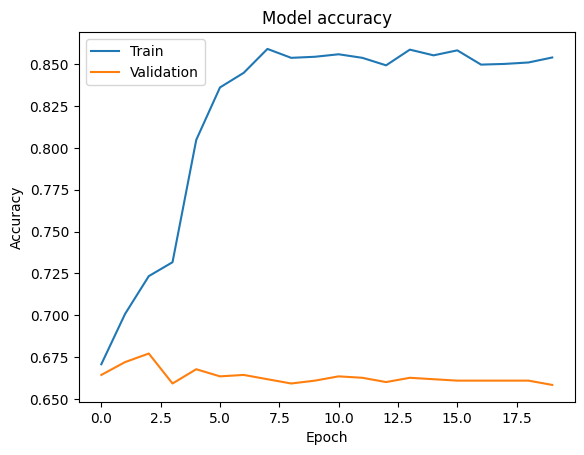

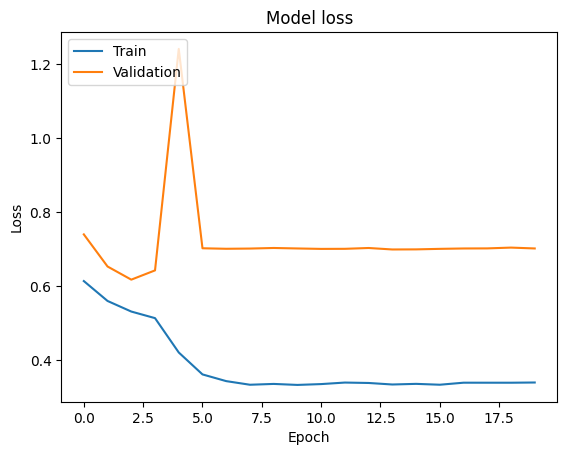

In [16]:
import matplotlib.pyplot as plt

def plot_history(history):
    # Plot training & validation accuracy values
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

    # Plot training & validation loss values
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()
    
plot_history(history)